In [1]:
import pandas as pd

In [4]:
mnist = pd.read_csv(r'E:\ExcelR_Ai_ass\CNN\fashion_mnist\fashion-mnist_train.csv')

In [5]:
mnist.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# split data into x & y form :

In [6]:
x = mnist.iloc[:,1:]
x.shape

(60000, 784)

In [7]:
y = mnist.iloc[:,0]
y.shape

(60000,)

In [8]:
y

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [8]:
import numpy as np
x = np.array(x)
y = np.array(y)

# Visualize first 25 images :

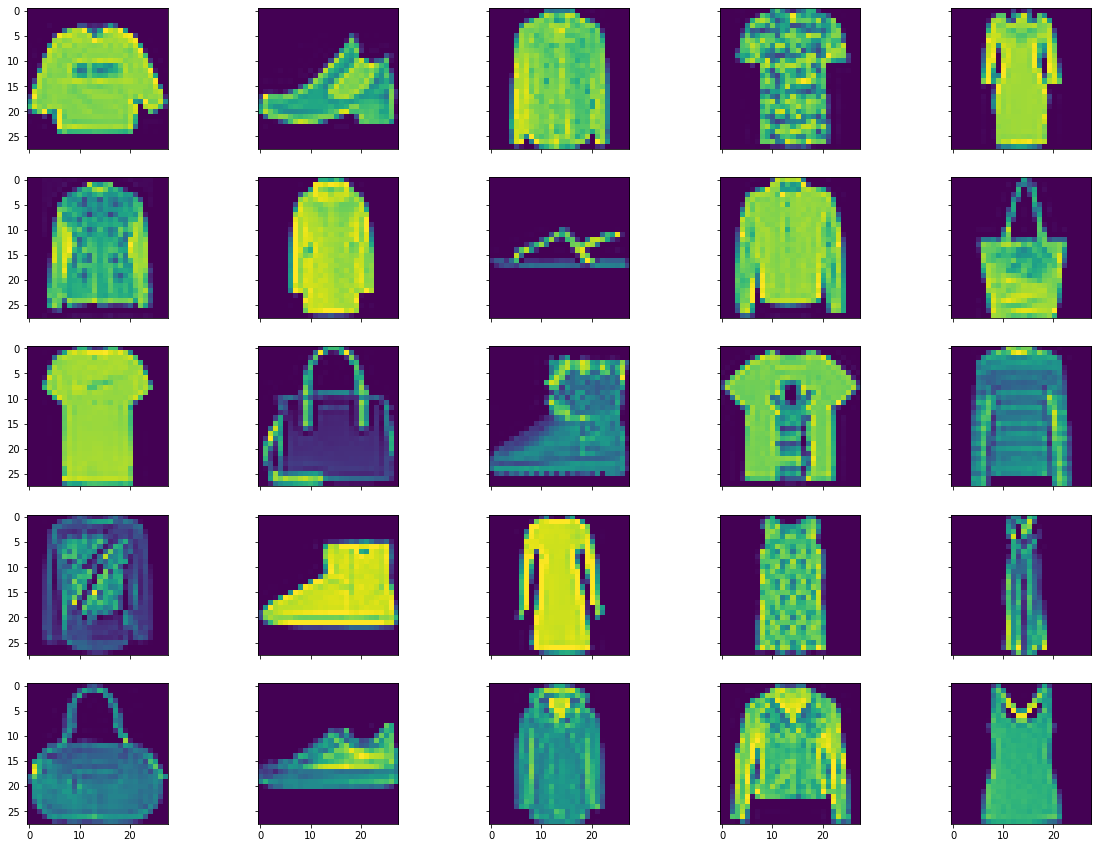

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n = 0
rows = 5
cols = 5
fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(20,15))
for row in range(rows):
    for col in range(cols):
        ax[row,col].imshow((x[n].reshape(28,28)))
        n += 1

## Convert classes into Categorical form :

In [12]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y, num_classes= 10)
y.shape

(60000, 10)

## Normalization :

In [13]:
x = x/255

In [14]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Reshape data :

In [15]:
x = x.reshape(-1,28,28,1)

In [16]:
x

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

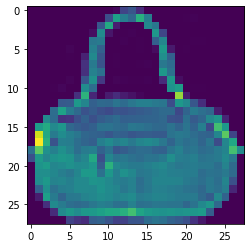

In [19]:
# visualize random data :
plt.imshow(x[20][:,:,0])

In [20]:
x.shape

(60000, 28, 28, 1)

# Split dataset into Training & Testing dataset :

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=7)
x_train.shape, x_test.shape

((51000, 28, 28, 1), (9000, 28, 28, 1))

In [23]:
y_train.shape, y_test.shape

((51000, 10), (9000, 10))

# Neural Structure :

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import RMSprop

In [136]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [137]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)         

## Optimizer :

In [138]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, decay=0.0)

## Model Compiling :

In [139]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])

## Setting Learning Parameters :

In [140]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

## Data Augmentation to prevent Overfitting :

In [152]:
epochs = 30
batch_size = 77

In [153]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [154]:
datagen.fit(x_train)

## Model Fitting :

In [155]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), verbose=2, steps_per_epoch=51000//batch_size, callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
662/662 - 333s - loss: 0.4344 - accuracy: 0.8392 - val_loss: 0.2964 - val_accuracy: 0.8899
Epoch 2/30
662/662 - 330s - loss: 0.4076 - accuracy: 0.8512 - val_loss: 0.2875 - val_accuracy: 0.8966
Epoch 3/30
662/662 - 331s - loss: 0.3927 - accuracy: 0.8574 - val_loss: 0.2922 - val_accuracy: 0.8932
Epoch 4/30
662/662 - 334s - loss: 0.3882 - accuracy: 0.8605 - val_loss: 0.2641 - val_accuracy: 0.9038
Epoch 5/30
662/662 - 333s - loss: 0.3868 - accuracy: 0.8623 - val_loss: 0.2778 - val_accuracy: 0.9027
Epoch 6/30
662/662 - 339s - loss: 0.3855 - accuracy: 0.8626 - val_loss: 0.3408 - val_accuracy: 0.8692
Epoch 7/30
662/662 - 336s - loss: 0.3834 - accuracy: 0.8641 - val_loss: 0.3120 - val_accuracy: 0.8830

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
662/662 - 333s - loss: 0.3488 - accuracy: 0.8750 - val_loss: 0.2506 - val_accuracy: 0.9081
Epoch 9/30
662/662 - 337s - loss: 0.3450 - accuracy: 0.8784 - val_loss: 0.2345 - val_accuracy: 0.9159
E

## Loss & Accuracy Validation Curve :

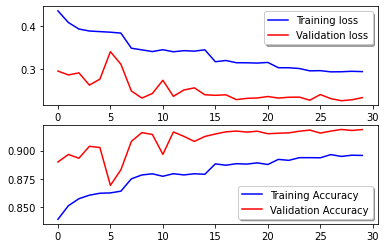

In [156]:
figure, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

## Prediction :

In [157]:
y_pred = model.predict(x_test)

In [158]:
y_pred

array([[4.0527297e-16, 3.3654486e-24, 4.6486025e-17, ..., 6.7676774e-17,
        1.0000000e+00, 3.7794996e-19],
       [6.0389089e-06, 2.7435345e-09, 3.9529945e-03, ..., 7.4134683e-12,
        1.1200337e-07, 1.6945719e-08],
       [2.5768804e-07, 3.9944797e-10, 7.2566507e-08, ..., 9.9424148e-01,
        9.5990536e-06, 2.5576283e-04],
       ...,
       [4.7427812e-03, 1.3191299e-06, 2.2525860e-01, ..., 1.3492225e-10,
        4.0486764e-05, 5.1480038e-07],
       [7.8853816e-02, 1.2990929e-03, 1.2638280e-02, ..., 7.7622366e-07,
        6.2377722e-04, 4.1915778e-06],
       [1.4026016e-16, 2.4035064e-18, 2.6488394e-14, ..., 3.7453142e-18,
        1.0655559e-13, 1.0326265e-13]], dtype=float32)

In [159]:
import numpy as np
# Convert into prediction classes :
y_pred_classes = np.argmax(y_pred, axis=1)

In [160]:
y_pred_classes

array([8, 4, 7, ..., 6, 3, 5])

In [161]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [162]:
y_true = np.argmax(y_test, axis=1)

In [163]:
y_true

array([8, 4, 7, ..., 6, 3, 5])

## Accuracy :

In [164]:
np.mean(y_pred_classes == y_true)

0.9185555555555556

## Confusion Matrix :

In [165]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

## Plot Confusion Matrix :

Text(0.5, 13.421126458070283, 'Predicted Label')

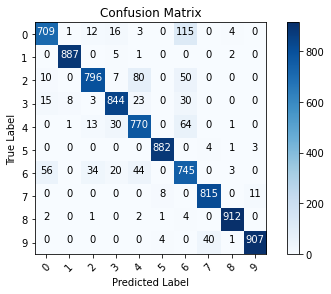

In [166]:
import itertools
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

## Error Calculation :

In [167]:
error = (y_pred_classes - y_true != 0)
error

array([False, False, False, ..., False, False, False])

In [168]:
# Assigning indexes of errors :
y_pred_classes_error = y_pred_classes[error]
y_pred_error = y_pred[error]
y_true_error = y_true[error]
x_val_error = x_test[error]

In [169]:
y_pred_error

array([[7.0853132e-01, 6.7008023e-07, 5.7667191e-04, ..., 2.3310606e-10,
        3.7942380e-05, 2.7676974e-09],
       [4.8635092e-01, 2.3763303e-06, 2.3205457e-03, ..., 2.1112401e-09,
        1.6014460e-04, 4.3328055e-07],
       [9.9249445e-02, 4.9670767e-03, 3.1020066e-01, ..., 1.3192840e-05,
        3.2424401e-02, 2.9585528e-04],
       ...,
       [1.9619202e-02, 2.9194489e-04, 4.3708719e-02, ..., 3.1309361e-07,
        2.3794874e-04, 1.9559750e-06],
       [8.4555177e-03, 1.2428523e-04, 2.4289644e-01, ..., 2.0326750e-07,
        5.5637257e-04, 1.3024652e-05],
       [9.2481576e-02, 1.0720131e-01, 5.8125570e-02, ..., 1.0806228e-03,
        3.3148132e-02, 2.2270128e-03]], dtype=float32)

## Probability of wrong Prediction :

In [170]:
y_pred_error_prob = np.max(y_pred_error, axis=1)

In [171]:
y_pred_error_prob

array([0.7085313 , 0.4898222 , 0.4319945 , 0.8144744 , 0.7267813 ,
       0.8359559 , 0.402593  , 0.51142555, 0.8136632 , 0.5362927 ,
       0.34204492, 0.5031464 , 0.5314051 , 0.5704314 , 0.69006324,
       0.6134282 , 0.69429135, 0.5425367 , 0.9890069 , 0.5787259 ,
       0.8074872 , 0.3615762 , 0.65794665, 0.51502275, 0.71801734,
       0.8109682 , 0.48921672, 0.29247165, 0.48140132, 0.45145926,
       0.5126164 , 0.6228059 , 0.6339508 , 0.5432145 , 0.9985153 ,
       0.5800326 , 0.7464842 , 0.56279933, 0.5380192 , 0.39503765,
       0.52762574, 0.65755427, 0.4312009 , 0.84556514, 0.38263142,
       0.67815274, 0.8035054 , 0.7032027 , 0.33382282, 0.5324251 ,
       0.70299095, 0.45875782, 0.5950688 , 0.8864414 , 0.6439903 ,
       0.43879476, 0.5467141 , 0.75978965, 0.79585713, 0.77470684,
       0.41888094, 0.9111392 , 0.43255258, 0.6817134 , 0.48187068,
       0.7069222 , 0.6662652 , 0.6867736 , 0.409984  , 0.53186655,
       0.55427784, 0.8697753 , 0.83421445, 0.55913246, 0.84804

## Probability of True Class in errors :

In [172]:
true_prob_error = np.diagonal(np.take(y_pred_error, y_true_error, axis=1))

In [173]:
true_prob_error

array([2.88266391e-01, 4.86350924e-01, 3.10200661e-01, 1.73449710e-01,
       1.23054832e-01, 1.60972655e-01, 3.96878064e-01, 2.76107132e-01,
       1.51140422e-01, 4.42148685e-01, 2.07388088e-01, 3.84010553e-01,
       4.51734245e-01, 3.39871675e-01, 2.46528592e-02, 2.32331023e-01,
       1.42116666e-01, 4.38568890e-01, 9.35208611e-03, 1.22088701e-01,
       1.21083543e-01, 1.24322802e-01, 3.09789211e-01, 3.15963686e-01,
       2.32786313e-01, 1.30591229e-01, 2.47272730e-01, 4.95545305e-02,
       3.46621066e-01, 4.11305934e-01, 4.01246130e-01, 2.65567988e-01,
       3.64041686e-01, 2.57274926e-01, 1.17746962e-03, 4.10495609e-01,
       2.01294214e-01, 1.39705762e-01, 3.94331872e-01, 3.38832736e-01,
       4.64179277e-01, 3.36851507e-01, 2.99445719e-01, 1.45849094e-01,
       1.67373300e-01, 3.06909621e-01, 1.74208865e-01, 2.90520072e-01,
       2.47738853e-01, 4.66647685e-01, 2.92361468e-01, 2.55188257e-01,
       1.61883205e-01, 4.22268026e-02, 3.51989657e-01, 3.60319108e-01,
      

## Difference between Probability of Predicted Label & True Label :

In [174]:
delta_pred_true_error = y_pred_error_prob - true_prob_error

In [175]:
delta_pred_true_error

array([4.20264930e-01, 3.47128510e-03, 1.21793836e-01, 6.41024709e-01,
       6.03726506e-01, 6.74983263e-01, 5.71492314e-03, 2.35318422e-01,
       6.62522793e-01, 9.41439867e-02, 1.34656832e-01, 1.19135857e-01,
       7.96708465e-02, 2.30559736e-01, 6.65410399e-01, 3.81097138e-01,
       5.52174687e-01, 1.03967786e-01, 9.79654789e-01, 4.56637174e-01,
       6.86403632e-01, 2.37253398e-01, 3.48157436e-01, 1.99059069e-01,
       4.85231042e-01, 6.80377007e-01, 2.41943985e-01, 2.42917120e-01,
       1.34780258e-01, 4.01533246e-02, 1.11370265e-01, 3.57237905e-01,
       2.69909143e-01, 2.85939574e-01, 9.97337818e-01, 1.69536978e-01,
       5.45189977e-01, 4.23093557e-01, 1.43687308e-01, 5.62049150e-02,
       6.34464622e-02, 3.20702761e-01, 1.31755173e-01, 6.99716032e-01,
       2.15258121e-01, 3.71243119e-01, 6.29296541e-01, 4.12682652e-01,
       8.60839635e-02, 6.57774210e-02, 4.10629481e-01, 2.03569561e-01,
       4.33185607e-01, 8.44214618e-01, 2.92000622e-01, 7.84756541e-02,
      

## Sorted list of high difference error Probabilities :

In [176]:
sorted_errors = np.argsort(delta_pred_true_error)

In [177]:
# Index of high error predicted Digit :
sorted_errors

array([286,  64, 575,  76,   1, 143, 245,   6, 303, 349, 195, 155, 102,
       113, 263, 464, 230,  82, 111, 368, 366, 428, 390, 465,  84, 634,
       714, 508, 453, 203,  91, 130, 571, 417, 487, 460, 541, 244, 284,
       122, 710, 461, 235, 588, 678, 326, 564, 172, 449, 694, 287, 630,
        29, 435, 154, 340, 520, 170, 279, 692, 273, 616, 392, 613, 388,
       127, 140, 164,  39, 259, 358, 434, 150, 563, 412, 332, 174, 438,
       387, 632,  40, 355,  49, 618, 283, 297, 201, 492, 474, 182, 351,
       298, 509, 373, 529, 636, 161, 240, 625, 540,  55, 255, 500,  12,
       654, 270, 169, 110, 440, 249,  48, 473, 180, 296, 383, 444, 418,
       436, 333, 458, 472, 165,   9, 138, 647, 584, 322, 317, 586, 321,
       707, 511, 643, 562, 330, 239, 429,  17, 573,  80, 285, 123, 664,
       272, 327, 545, 689, 406, 648, 315,  30, 437, 145,  83, 655,  56,
       572,  11, 728,   2, 686, 589, 581, 116,  60, 681, 250, 642, 554,
       495, 151,  42, 341, 334, 293, 531,  10,  69,  28, 194, 65

# Show Top 25 Error :

In [196]:
cat = {0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot' }

In [195]:
cat[0]

'T-shirt/top'

In [178]:
top_error = sorted_errors[-25:]

In [179]:
top_error

array([129, 454, 450, 214, 291, 146, 524, 325, 356,  78, 290, 104, 583,
       560, 219, 264, 210, 561,  18, 432,  34, 696, 533, 597, 313])

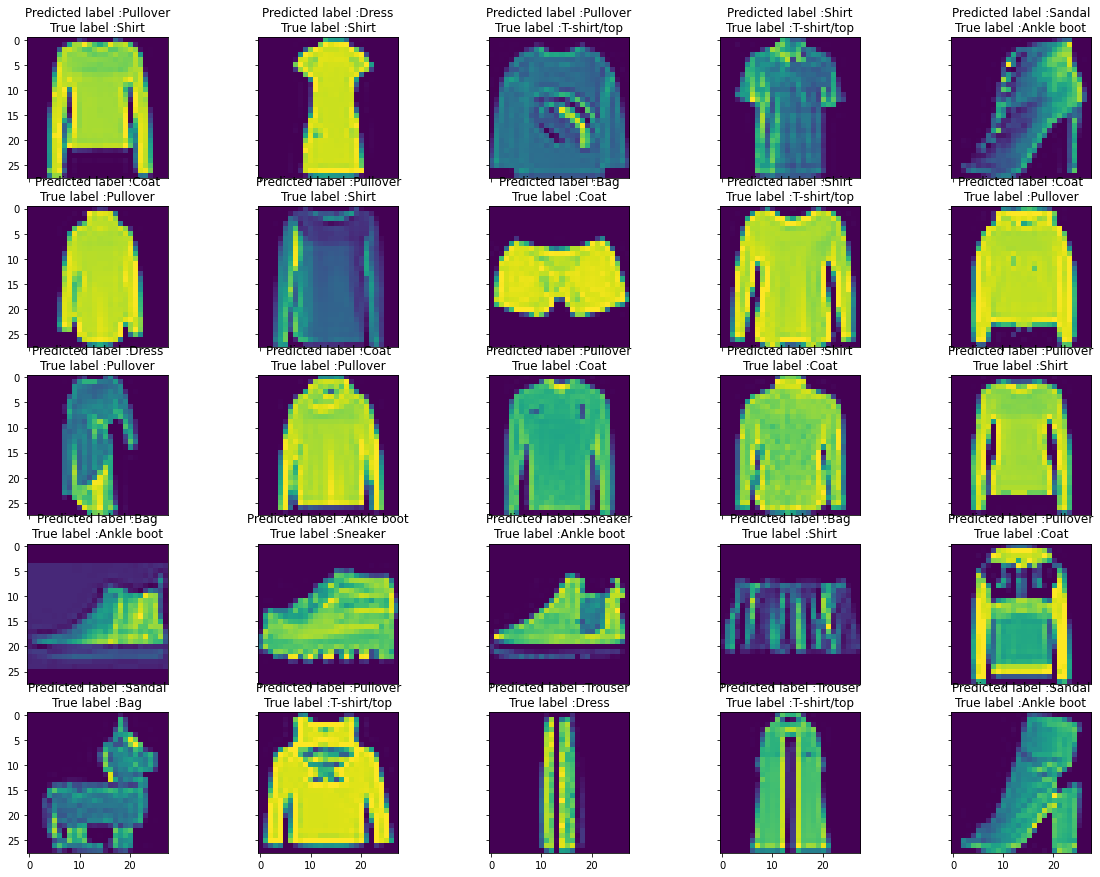

In [197]:
n = 0
nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True , figsize=(20,15))
for row in range(nrows):
  for col in range(ncols):
    error = top_error[n]
    ax[row, col].imshow((x_val_error[error]).reshape((28,28)))
    ax[row, col].set_title("Predicted label :{}\nTrue label :{}".format(cat[y_pred_classes_error[error]], cat[y_true_error[error]]))
    n += 1

# Calculation For Correctly Predicted Class :

In [181]:
correct = (y_pred_classes - y_true == 0)

In [182]:
correct

array([ True,  True,  True, ...,  True,  True,  True])

In [183]:
# Assigning indexes of correct prediction :
y_pred_classes_crt = y_pred_classes[correct]
y_pred_crt = y_pred[correct]
y_true_crt = y_true[correct]
x_val_crt = x_test[correct]

In [184]:
y_pred_classes_crt

array([8, 4, 7, ..., 6, 3, 5])

In [185]:
y_pred_crt

array([[4.0527297e-16, 3.3654486e-24, 4.6486025e-17, ..., 6.7676774e-17,
        1.0000000e+00, 3.7794996e-19],
       [6.0389089e-06, 2.7435345e-09, 3.9529945e-03, ..., 7.4134683e-12,
        1.1200337e-07, 1.6945719e-08],
       [2.5768804e-07, 3.9944797e-10, 7.2566507e-08, ..., 9.9424148e-01,
        9.5990536e-06, 2.5576283e-04],
       ...,
       [4.7427812e-03, 1.3191299e-06, 2.2525860e-01, ..., 1.3492225e-10,
        4.0486764e-05, 5.1480038e-07],
       [7.8853816e-02, 1.2990929e-03, 1.2638280e-02, ..., 7.7622366e-07,
        6.2377722e-04, 4.1915778e-06],
       [1.4026016e-16, 2.4035064e-18, 2.6488394e-14, ..., 3.7453142e-18,
        1.0655559e-13, 1.0326265e-13]], dtype=float32)

## Probability of Correct Prediction :

In [186]:
y_pred_crt_prob = np.max(y_pred_crt, axis=1)

In [187]:
y_pred_crt_prob

array([1.       , 0.7148784, 0.9942415, ..., 0.7517274, 0.7881318,
       1.       ], dtype=float32)

In [188]:
sorted_crt = np.argsort(y_pred_crt_prob)

In [189]:
sorted_crt

array([4633, 3785, 1432, ..., 4464, 4416, 8266])

# Top 25 Correct Prediction :

In [190]:
top_crt = sorted_crt[-25:]

In [191]:
top_crt

array([4626, 4564, 4368, 4476, 4470, 4372, 4385, 4391, 4392, 4395, 4403,
       4404, 4405, 4471, 4407, 4434, 4435, 4437, 4456, 4457, 4458, 4463,
       4464, 4416, 8266])

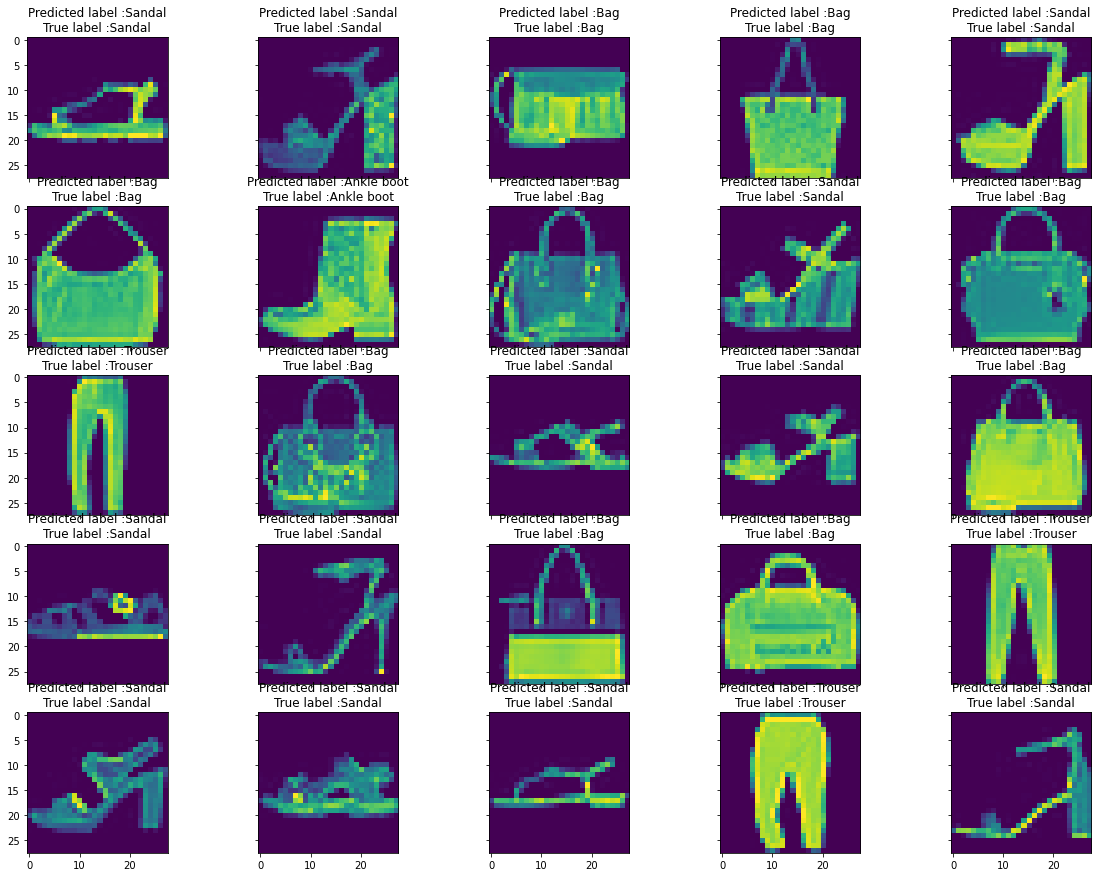

In [198]:
n = 0
nrows = 5
ncols = 5
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True , figsize=(20,15))
for row in range(nrows):
  for col in range(ncols):
    crt = top_crt[n]
    ax[row, col].imshow((x_val_crt[crt]).reshape((28,28)))
    ax[row, col].set_title("Predicted label :{}\nTrue label :{}".format(cat[y_pred_classes_crt[crt]], cat[y_true_crt[crt]]))
    n += 1